In [1]:
# Gerekli kütüphaneleri yükle
!pip install roboflow ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 114.3 MB/s eta 0:00:00


In [2]:
# Roboflow'dan veri setini indir
from roboflow import Roboflow

rf = Roboflow(api_key="uwbLCWSnHV2geuphu3jv")
project = rf.workspace("deneme-nq1dn").project("jugadores-tenis-ewdex")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Jugadores-Tenis-1 in yolov8:: 100%|██████████| 13906/13906 [00:01<00:00, 8637.69it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Gerekli kütüphaneleri import et
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
from IPython.display import Image as IPImage, display
import shutil
import glob

In [7]:
# YOLOv8 modelini yükle ve 40 epoch ile eğit
model = YOLO('yolov8n.pt')  # Pretrained YOLOv8 nano model

# data.yaml dosyasının yolunu belirt
data_yaml = os.path.join(dataset.location, 'data.yaml')

# Modeli eğit
results = model.train(
    data=data_yaml,
    epochs=40,
    imgsz=640,
    batch=16,
    name='kort_detection',
    patience=10,
    save=True,
    plots=True
)

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Jugadores-Tenis-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=kort_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, p

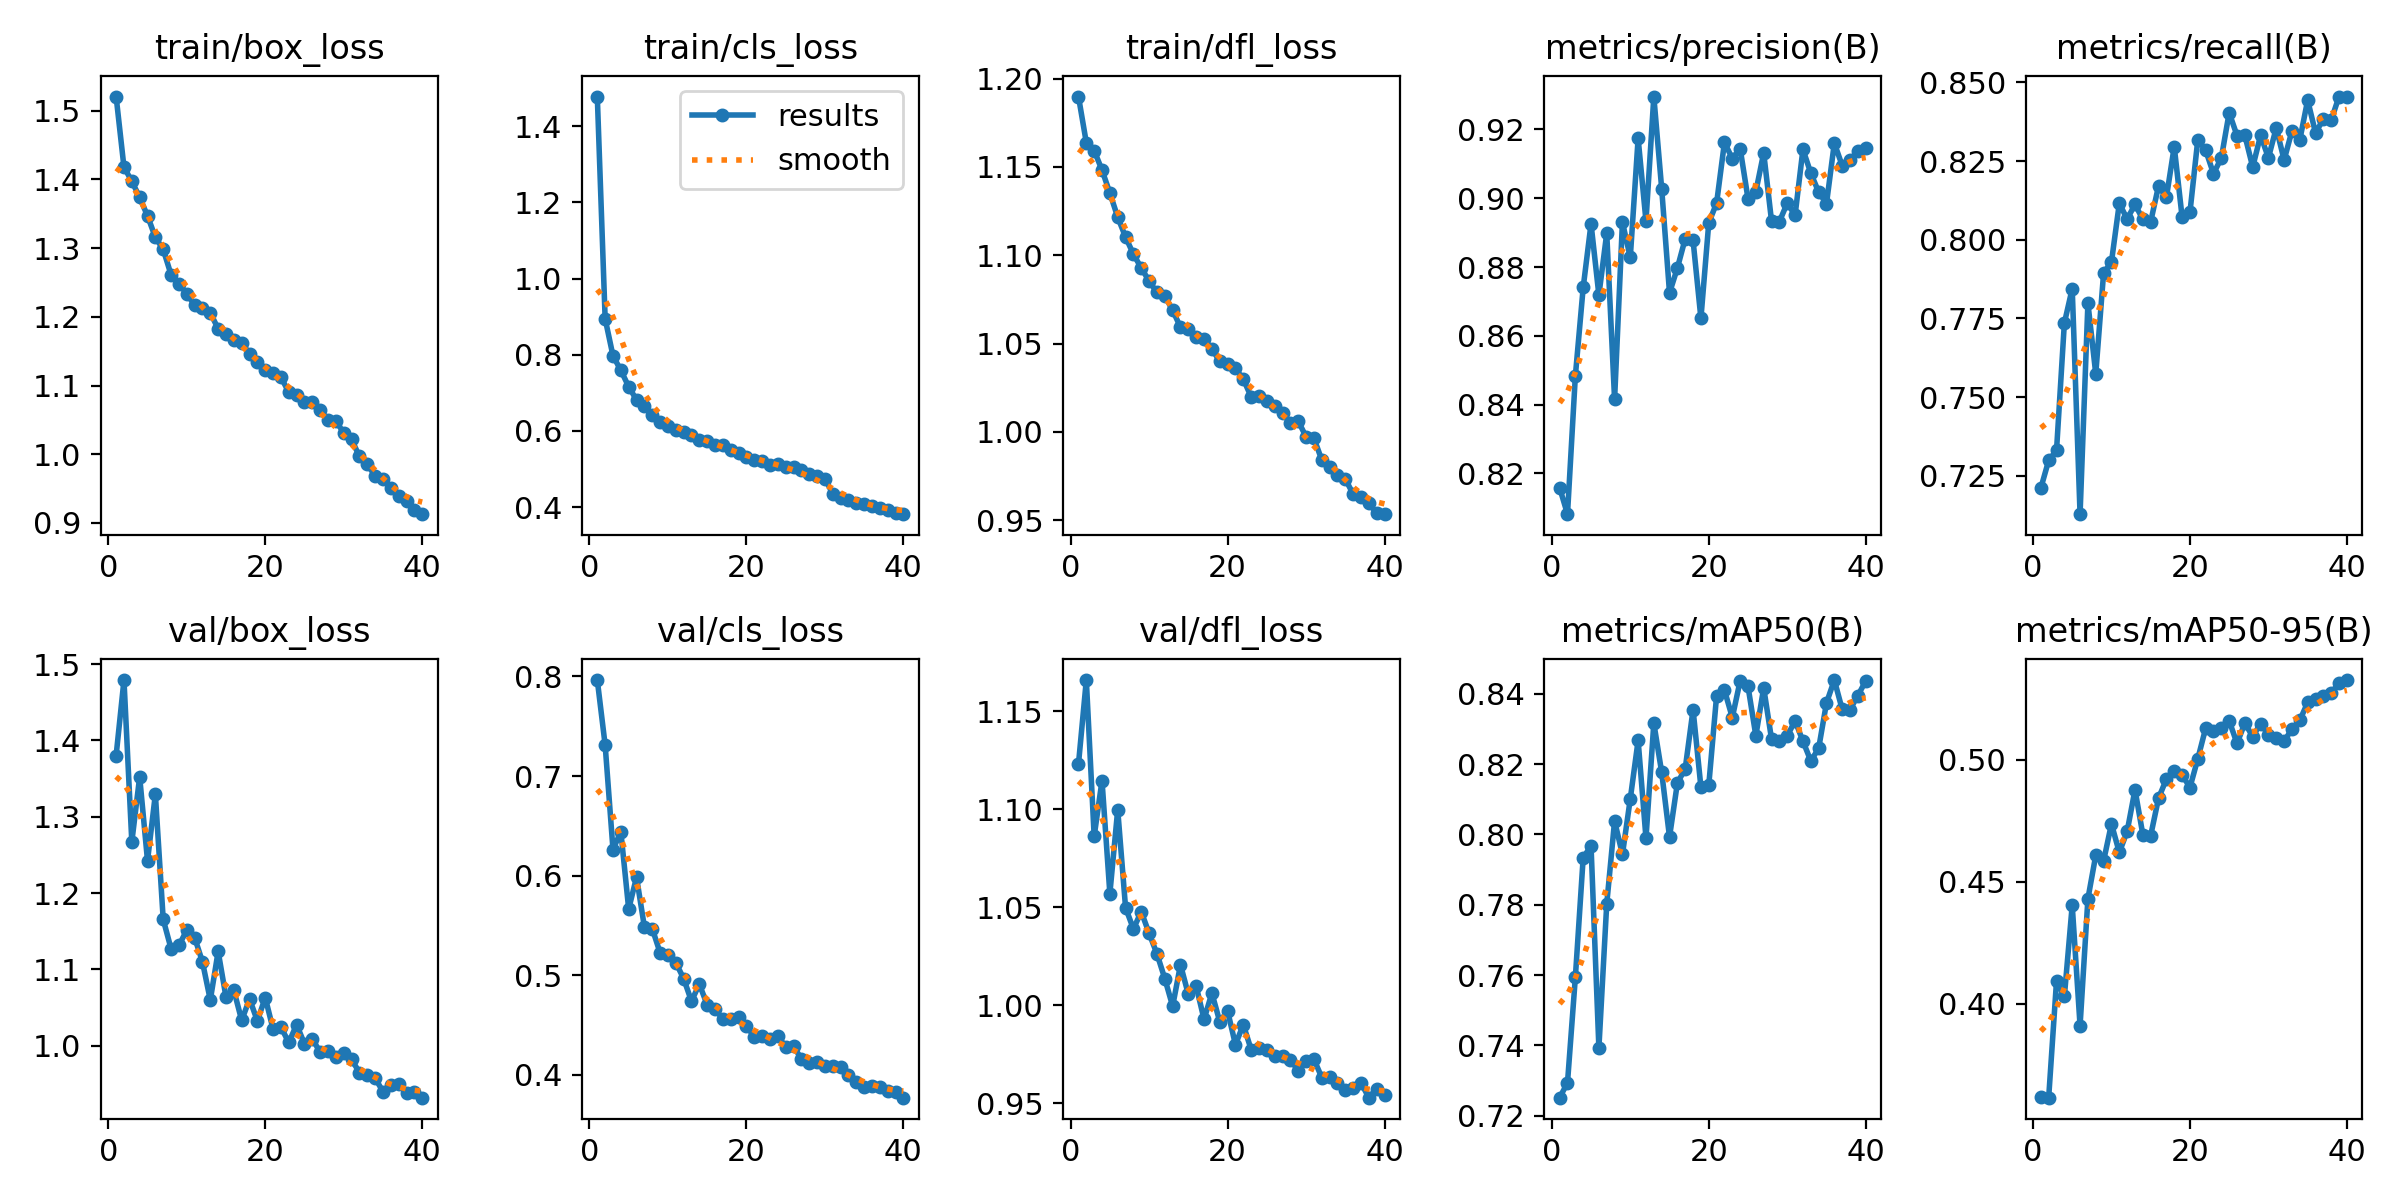

Eğitim sonuçları grafiği


In [8]:
# Eğitim sonuçlarını görselleştir
results_path = 'runs/detect/kort_detection/results.png'
if os.path.exists(results_path):
    display(IPImage(filename=results_path))
    print("Eğitim sonuçları grafiği")
else:
    print("Sonuç grafiği bulunamadı")

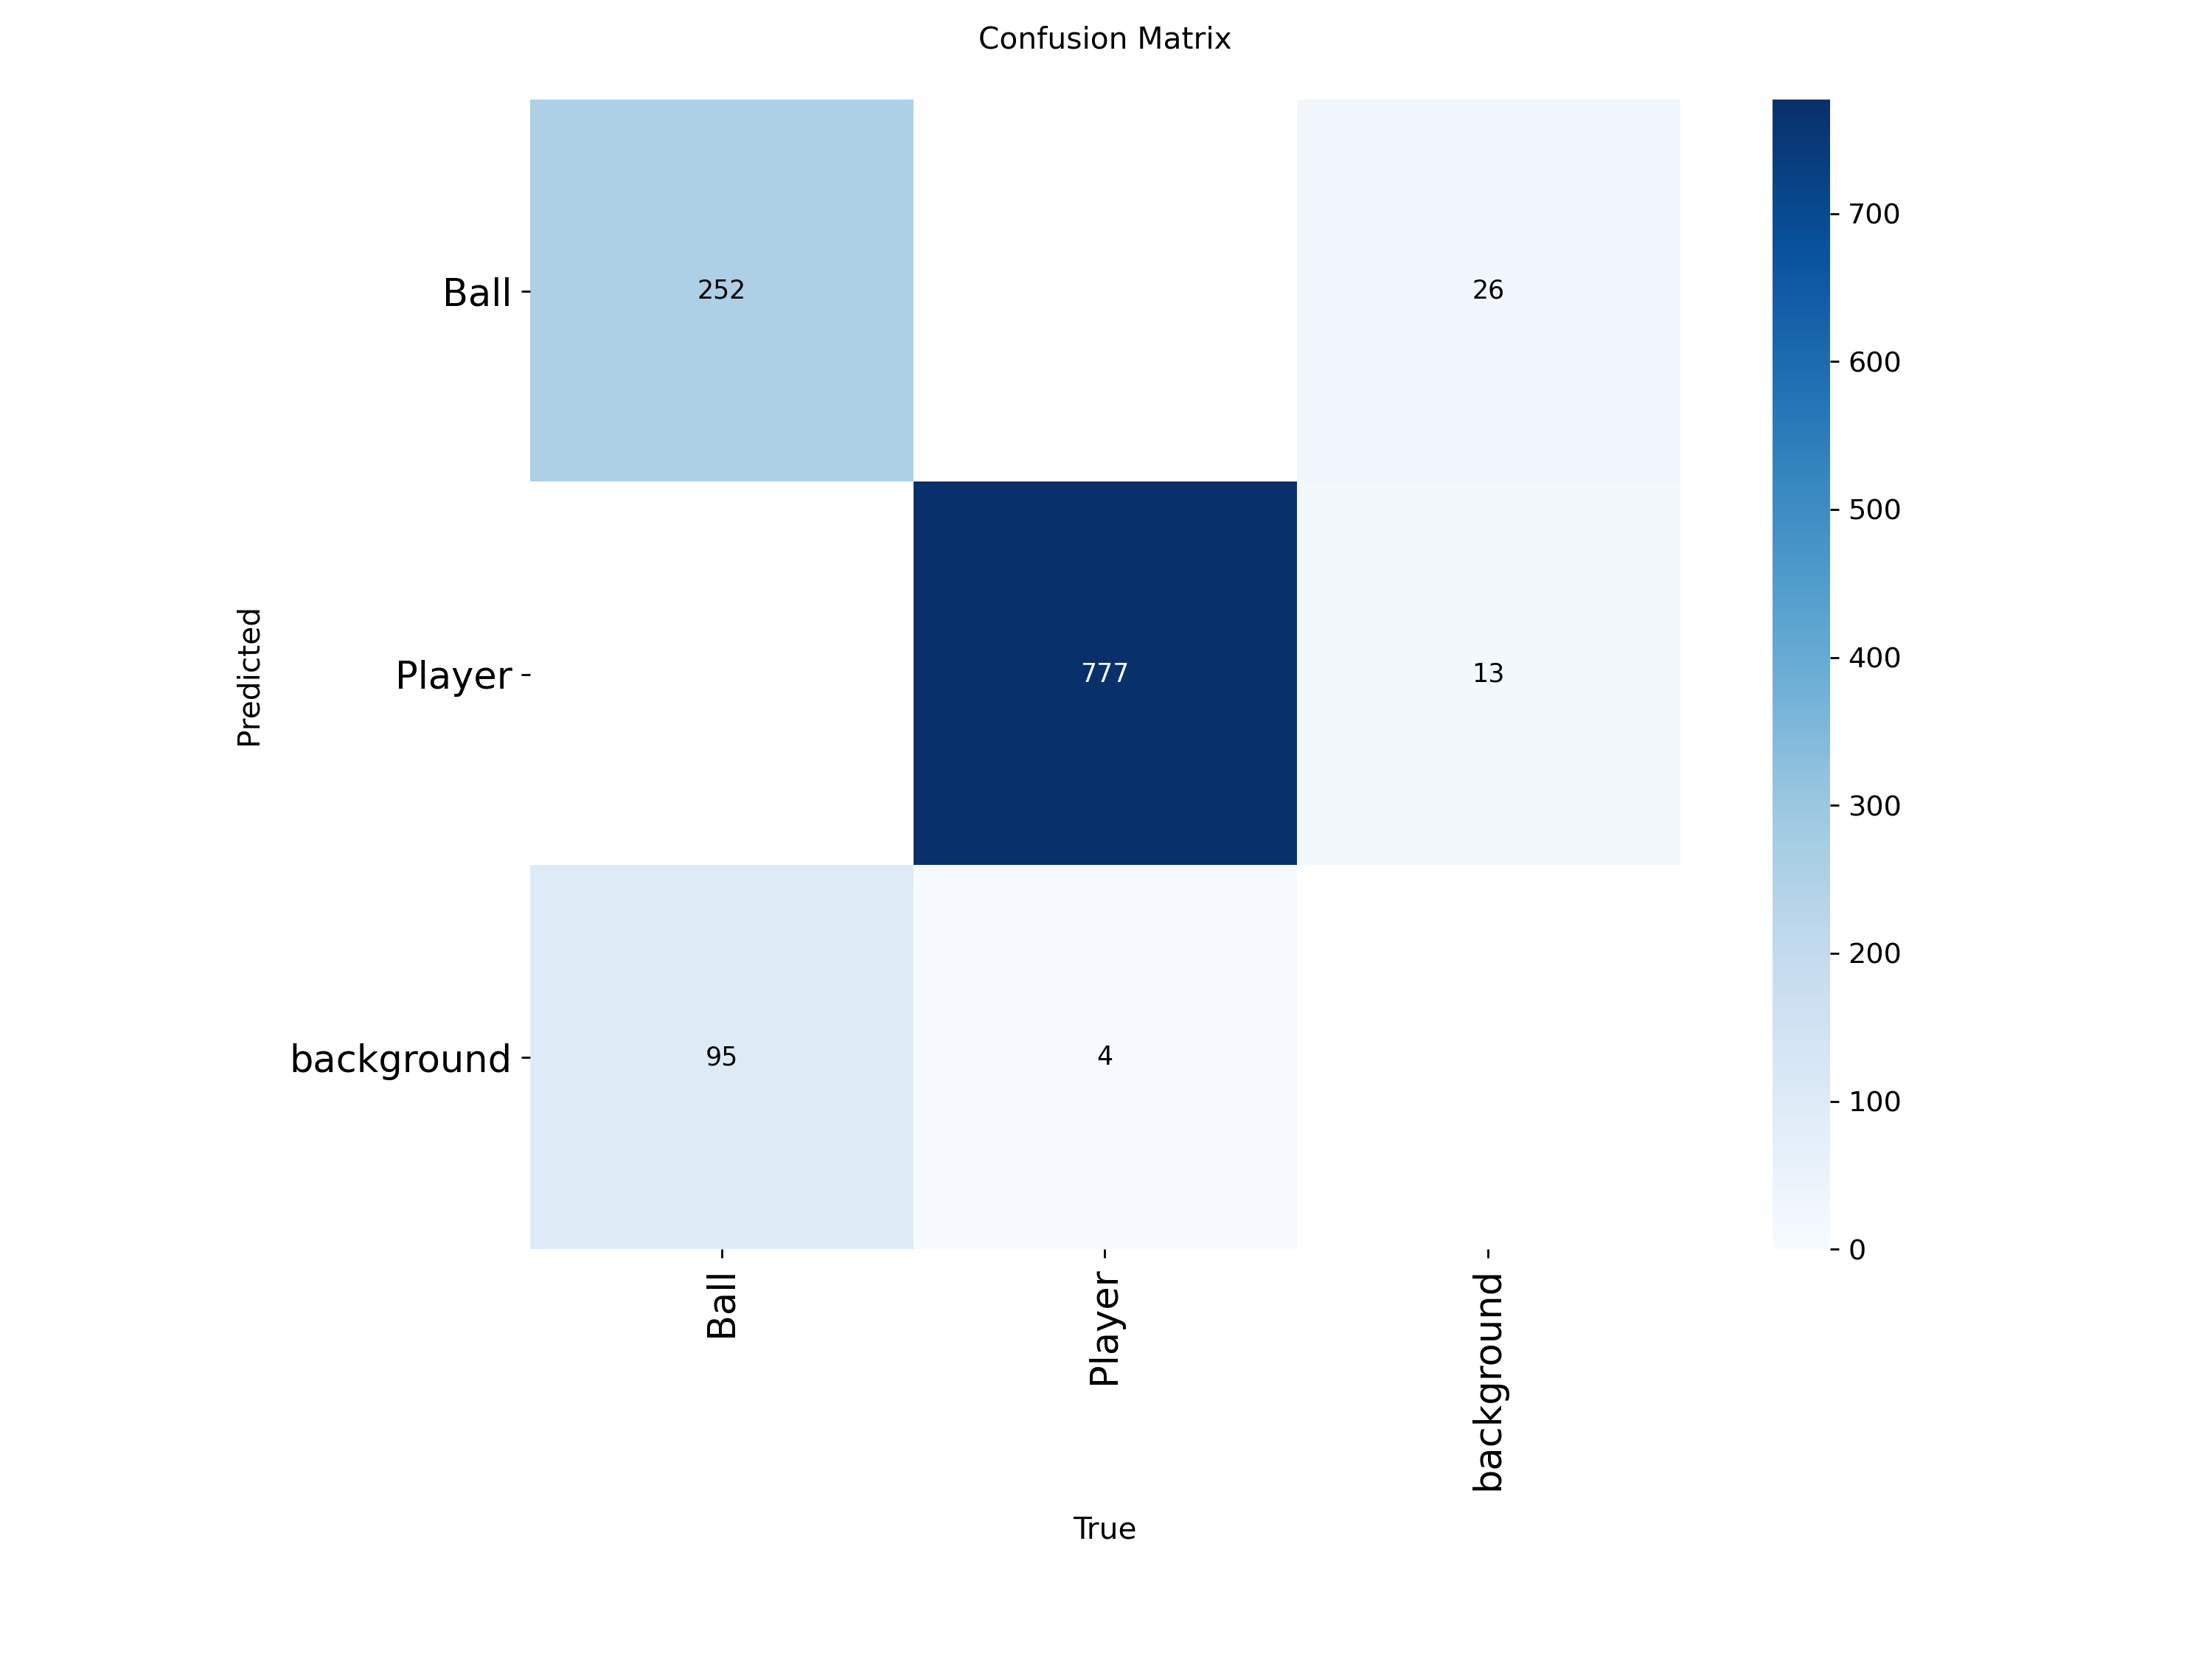

Confusion Matrix


In [9]:
# Confusion Matrix'i görselleştir
confusion_matrix_path = 'runs/detect/kort_detection/confusion_matrix.png'
if os.path.exists(confusion_matrix_path):
    display(IPImage(filename=confusion_matrix_path))
    print("Confusion Matrix")
else:
    print("Confusion Matrix bulunamadı")

In [10]:
# En iyi modeli kort_best.pt olarak kaydet
import os
import shutil

best_model_path = 'runs/detect/kort_detection/weights/best.pt'
save_path = r'kort_best.pt'

if os.path.exists(best_model_path):
    shutil.copy(best_model_path, save_path)
    print(f"✓ Model kaydedildi: {save_path}")
    print(f"✓ Dosya boyutu: {os.path.getsize(save_path) / (1024*1024):.2f} MB")
    print(f"✓ Dosya kontrolü: {os.path.exists(save_path)}")
else:
    print(f"❌ Model bulunamadı: {best_model_path}")
    print("Mevcut runs klasörü içeriği:")
    if os.path.exists('runs/detect'):
        print(os.listdir('runs/detect'))

✓ Model kaydedildi: kort_best.pt
✓ Dosya boyutu: 5.96 MB
✓ Dosya kontrolü: True


In [12]:
# Test veri seti ile modeli değerlendir
model_path = r'kort_best.pt'

if os.path.exists(model_path):
    best_model = YOLO(model_path)

    # Test veri seti üzerinde değerlendirme
    test_results = best_model.val(data=data_yaml, split='test')

    # Metrikleri yazdır
    print("\n=== Test Sonuçları ===")
    print(f"mAP50: {test_results.box.map50:.4f}")
    print(f"mAP50-95: {test_results.box.map:.4f}")
    print(f"Precision: {test_results.box.mp:.4f}")
    print(f"Recall: {test_results.box.mr:.4f}")
else:
    print(f"❌ Model bulunamadı: {model_path}")

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1125.7±527.3 MB/s, size: 51.8 KB)
val: Scanning /content/Jugadores-Tenis-1/test/labels... 53 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 53/53 1.4Kit/s 0.0s
val: New cache created: /content/Jugadores-Tenis-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.7it/s 1.5s
                   all         53        149      0.886      0.889      0.874       0.55
                  Ball         45         45      0.806      0.778      0.756      0.302
                Player         53        104      0.965          1      0.992      0.798
Speed: 3.9ms preprocess, 7.1ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to /content/runs/detect/val

=== Test Sonuçları ===
mAP50: 0.873

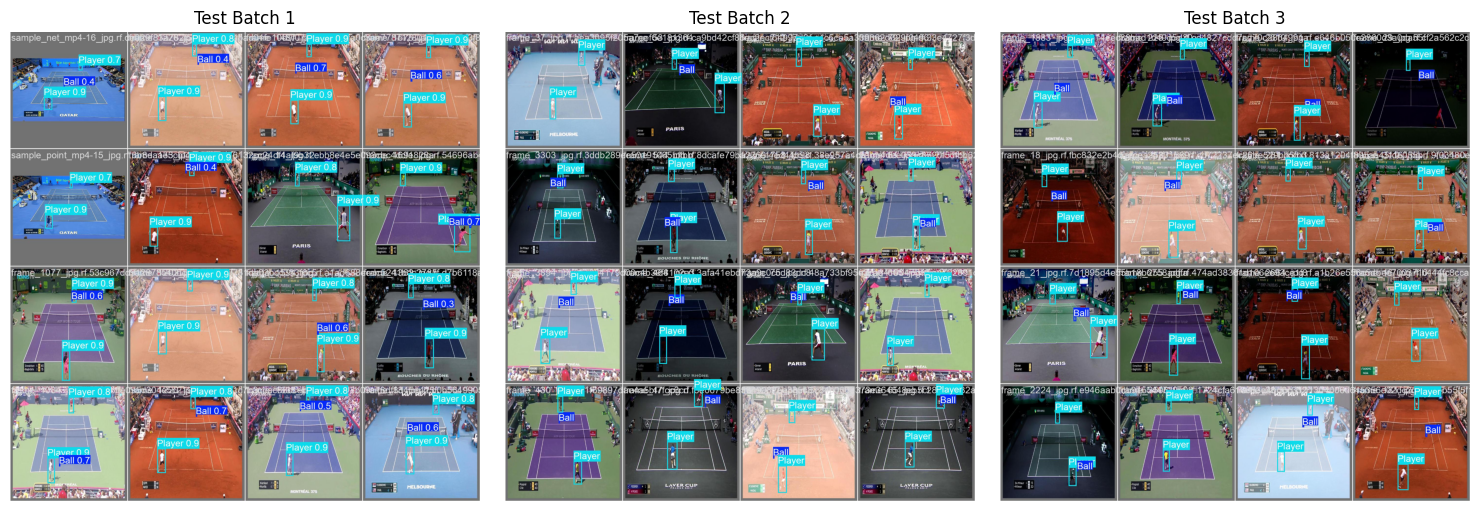

Test batch görüntüleri


In [13]:
# Test sonuçlarını görselleştir
test_images = glob.glob('runs/detect/val*/labels/*.txt')
if test_images:
    print(f"\n{len(test_images)} test görseli işlendi")

# Validation sonuçlarını göster
val_batch_path = glob.glob('runs/detect/val*/val_batch*.jpg')
if val_batch_path:
    fig, axes = plt.subplots(1, min(3, len(val_batch_path)), figsize=(15, 5))
    if len(val_batch_path) == 1:
        axes = [axes]

    for idx, img_path in enumerate(val_batch_path[:3]):
        img = Image.open(img_path)
        if len(val_batch_path) > 1:
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f'Test Batch {idx+1}')
        else:
            axes[0].imshow(img)
            axes[0].axis('off')
            axes[0].set_title('Test Batch')

    plt.tight_layout()
    plt.show()
    print("Test batch görüntüleri")

🖼️ Görsel testi başlatılıyor...

image 1/1 /content/tk.PNG: 384x640 2 Players, 60.2ms
Speed: 1.8ms preprocess, 60.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict


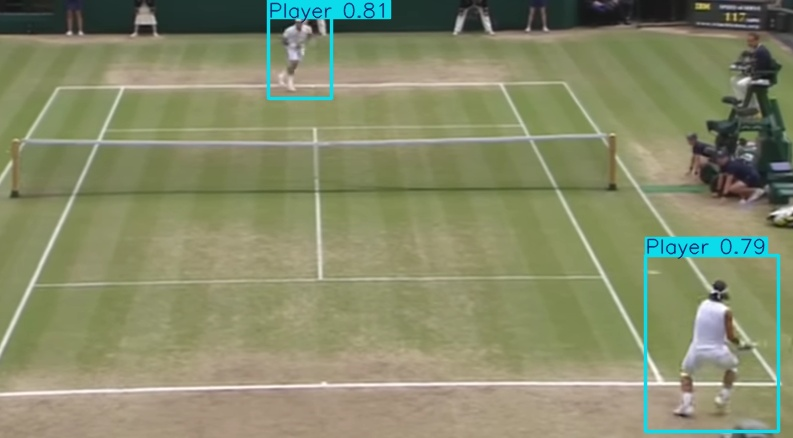


✅ Görsel testi tamamlandı!
✅ Tespit edilen nesne sayısı: 2
✅ Sonuç kaydedildi: test_result.jpg


In [14]:
# Görsel ile test
print("🖼️ Görsel testi başlatılıyor...")

# Model ve görsel yolları
model_path = r'kort_best.pt'
test_image_path = r'tk.PNG'
output_path = r'test_result.jpg'

# Model yükle ve tahmin yap
model_test = YOLO(model_path)
results = model_test.predict(test_image_path, save=True, conf=0.25)

# İlk sonucu göster ve kaydet
if results:
    result = results[0]
    result.save(filename=output_path)

    # Jupyter'de göster
    display(IPImage(filename=output_path))

    # Tespit edilen nesneleri göster
    boxes = result.boxes
    print(f"\n✅ Görsel testi tamamlandı!")
    print(f"✅ Tespit edilen nesne sayısı: {len(boxes)}")
    print(f"✅ Sonuç kaydedildi: {output_path}")
else:
    print("❌ Tahmin yapılamadı")

In [ ]:
# Video ile test
print("🎥 Video testi başlatılıyor...")

# Model ve video yolları
model_path = r'kort_best.pt'
test_video_path = r'tenis_test.mp4'
output_dir = r'tenis_output.mp4'

# Video bilgilerini al
cap = cv2.VideoCapture(test_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

print(f"📹 Video bilgisi: {width}x{height}, {fps} FPS, {total_frames} frame")
print(f"⏳ İşleniyor (bu birkaç dakika sürebilir)...")

# Model yükle ve video üzerinde tahmin yap
model_video = YOLO(model_path)
results = model_video.predict(
    source=test_video_path,
    save=True,
    project=output_dir,
    name='video_output',
    conf=0.25,
    save_txt=False
)

print(f"\n✅ Video testi tamamlandı!")
print(f"✅ Sonuç klasörü: {output_dir}\\video_output")
print(f"📁 İşlenmiş video orada bulunur")